In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('players_20.csv')

In [38]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [39]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [40]:
#filling null values
df.fillna(0,inplace=True)

In [41]:
df.isna().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

In [42]:
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [43]:
messi=df.loc[df['short_name']=='L. Messi']
messi= pd.DataFrame(messi,columns=skills)

ronaldo=df.loc[df['short_name']=='Cristiano Ronaldo']
ronaldo= pd.DataFrame(ronaldo,columns=skills)

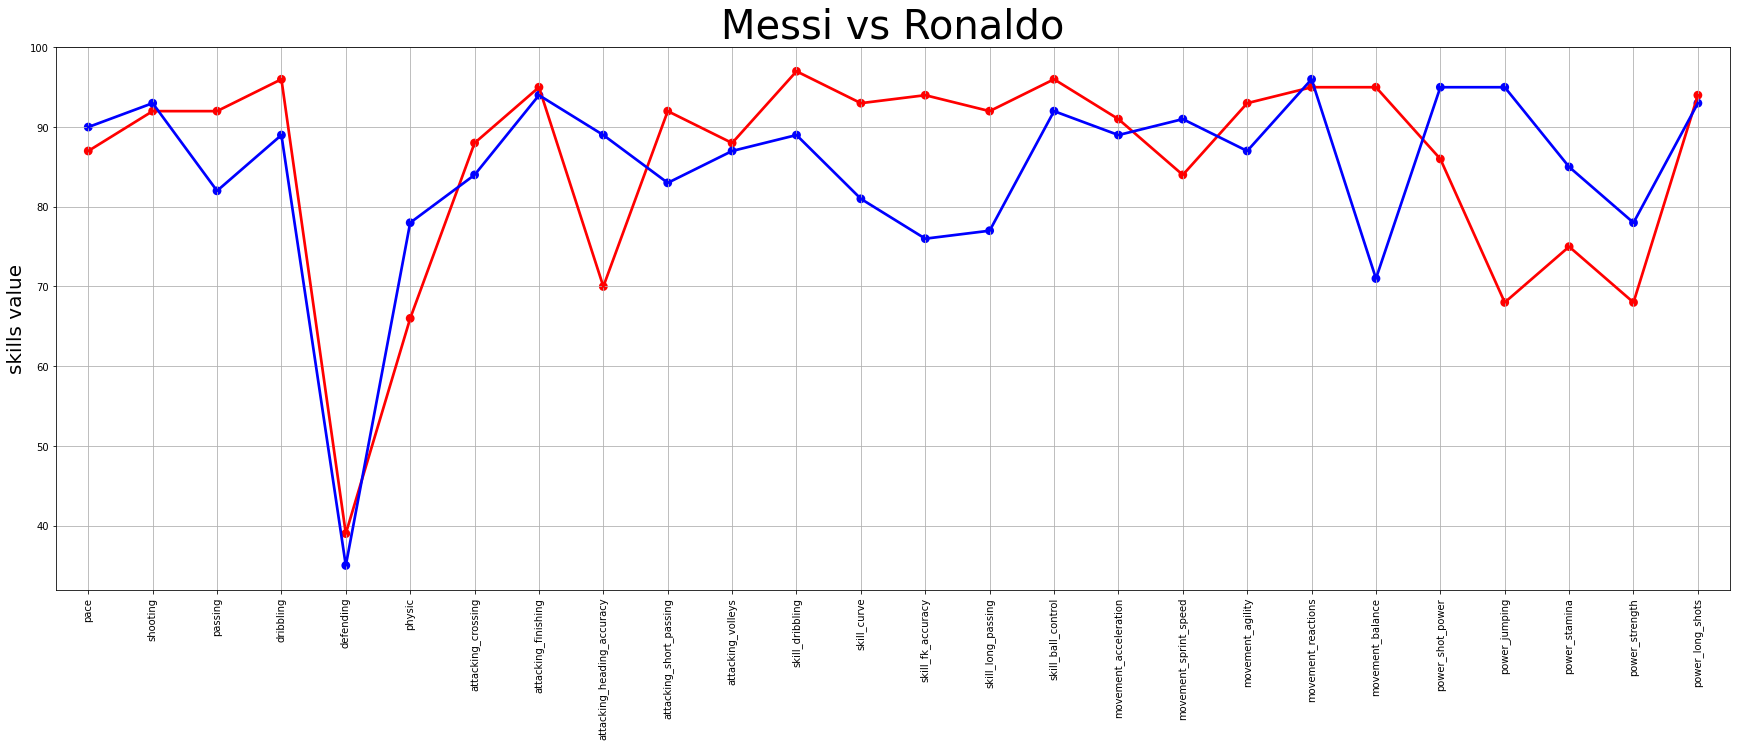

In [44]:
plt.figure(figsize=(30,10))
sns.pointplot(data=messi,color='red')
sns.pointplot(data=ronaldo,color='blue')
plt.title("Messi vs Ronaldo",fontsize=40)
plt.xticks(rotation=90)
plt.xlabel=("skills")
plt.ylabel("skills value",fontsize=20)
plt.grid()

In [110]:
from importlib import reload
plt=reload(plt)

##issue solved str is not callable

## Preferred foot by players

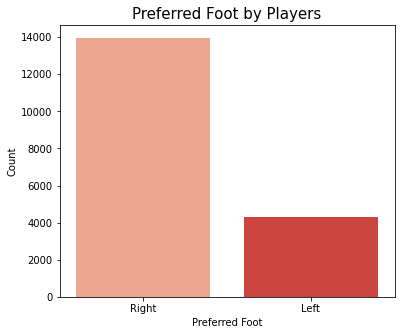

In [111]:
plt.figure(figsize=(6,5))
sns.barplot(x=df['preferred_foot'].value_counts().keys(),y=df['preferred_foot'].value_counts(),palette='Reds')
plt.title('Preferred Foot by Players',fontsize=15)
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.show()

Left footed footballers

In [112]:
df[df['preferred_foot']=='Left'][['short_name','club','nationality']].head(10)

,short_name,club,nationality
0,L. Messi,FC Barcelona,Argentina
9,M. Salah,Liverpool,Egypt
16,G. Chiellini,Juventus,Italy
22,A. Griezmann,FC Barcelona,France
23,P. Dybala,Juventus,Argentina
25,Ederson,Manchester City,Brazil
28,T. Courtois,Real Madrid,Belgium
32,H. Lloris,Tottenham Hotspur,France
33,David Silva,Manchester City,Spain
40,A. Laporte,Manchester City,France


Top 10 right footed footballers

In [113]:
df[df['preferred_foot']=='Right'][['short_name','club','nationality']].head(10)

,short_name,club,nationality
1,Cristiano Ronaldo,Juventus,Portugal
2,Neymar Jr,Paris Saint-Germain,Brazil
3,J. Oblak,Atlético Madrid,Slovenia
4,E. Hazard,Real Madrid,Belgium
5,K. De Bruyne,Manchester City,Belgium
6,M. ter Stegen,FC Barcelona,Germany
7,V. van Dijk,Liverpool,Netherlands
8,L. Modrić,Real Madrid,Croatia
10,K. Mbappé,Paris Saint-Germain,France
11,K. Koulibaly,Napoli,Senegal


Comparing performance of left footed and right footed footballers.

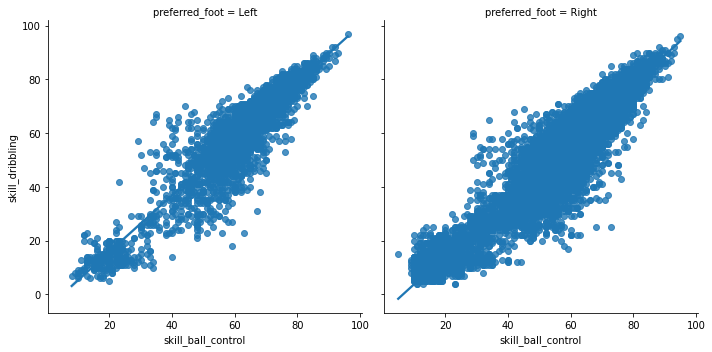

In [114]:
sns.lmplot(x = 'skill_ball_control',y = 'skill_dribbling', data=df, col='preferred_foot')
plt.show()

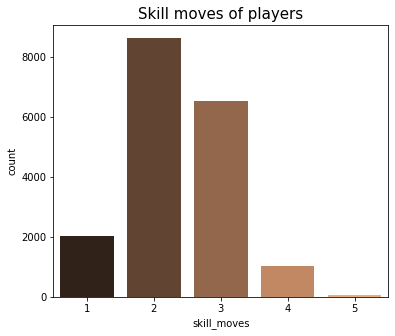

In [115]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['skill_moves'],data=df,palette='copper')
plt.title('Skill moves of players',fontsize=15)              
plt.show()

## Players on the basis of height.

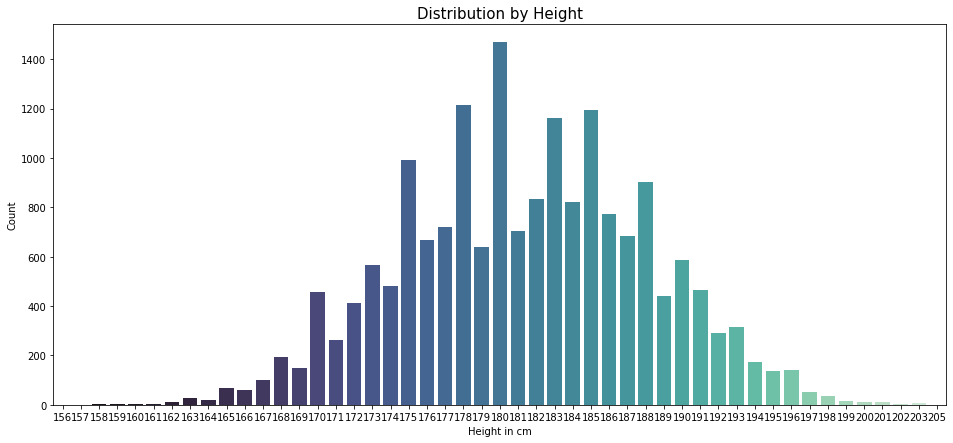

In [116]:
plt.figure(figsize=(16,7))
sns.countplot(x='height_cm',data=df,palette='mako')
plt.title('Distribution by Height',fontsize=15)
plt.xlabel('Height in cm')
plt.ylabel('Count')
plt.show()

## Distribution of players on the basis of age.

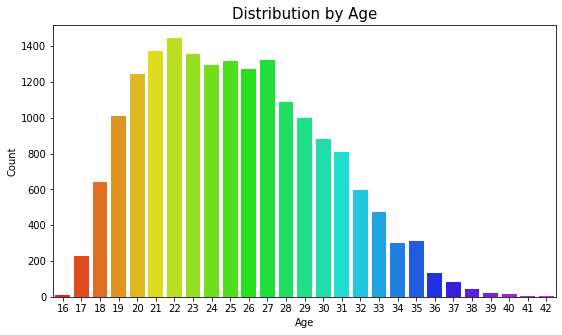

In [117]:
plt.figure(figsize=(9,5))
sns.countplot(x='age',data=df,palette='gist_rainbow')
plt.title('Distribution by Age',fontsize=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [118]:
numerical_col = df[['height_cm','weight_kg','age','potential','wage_eur']]

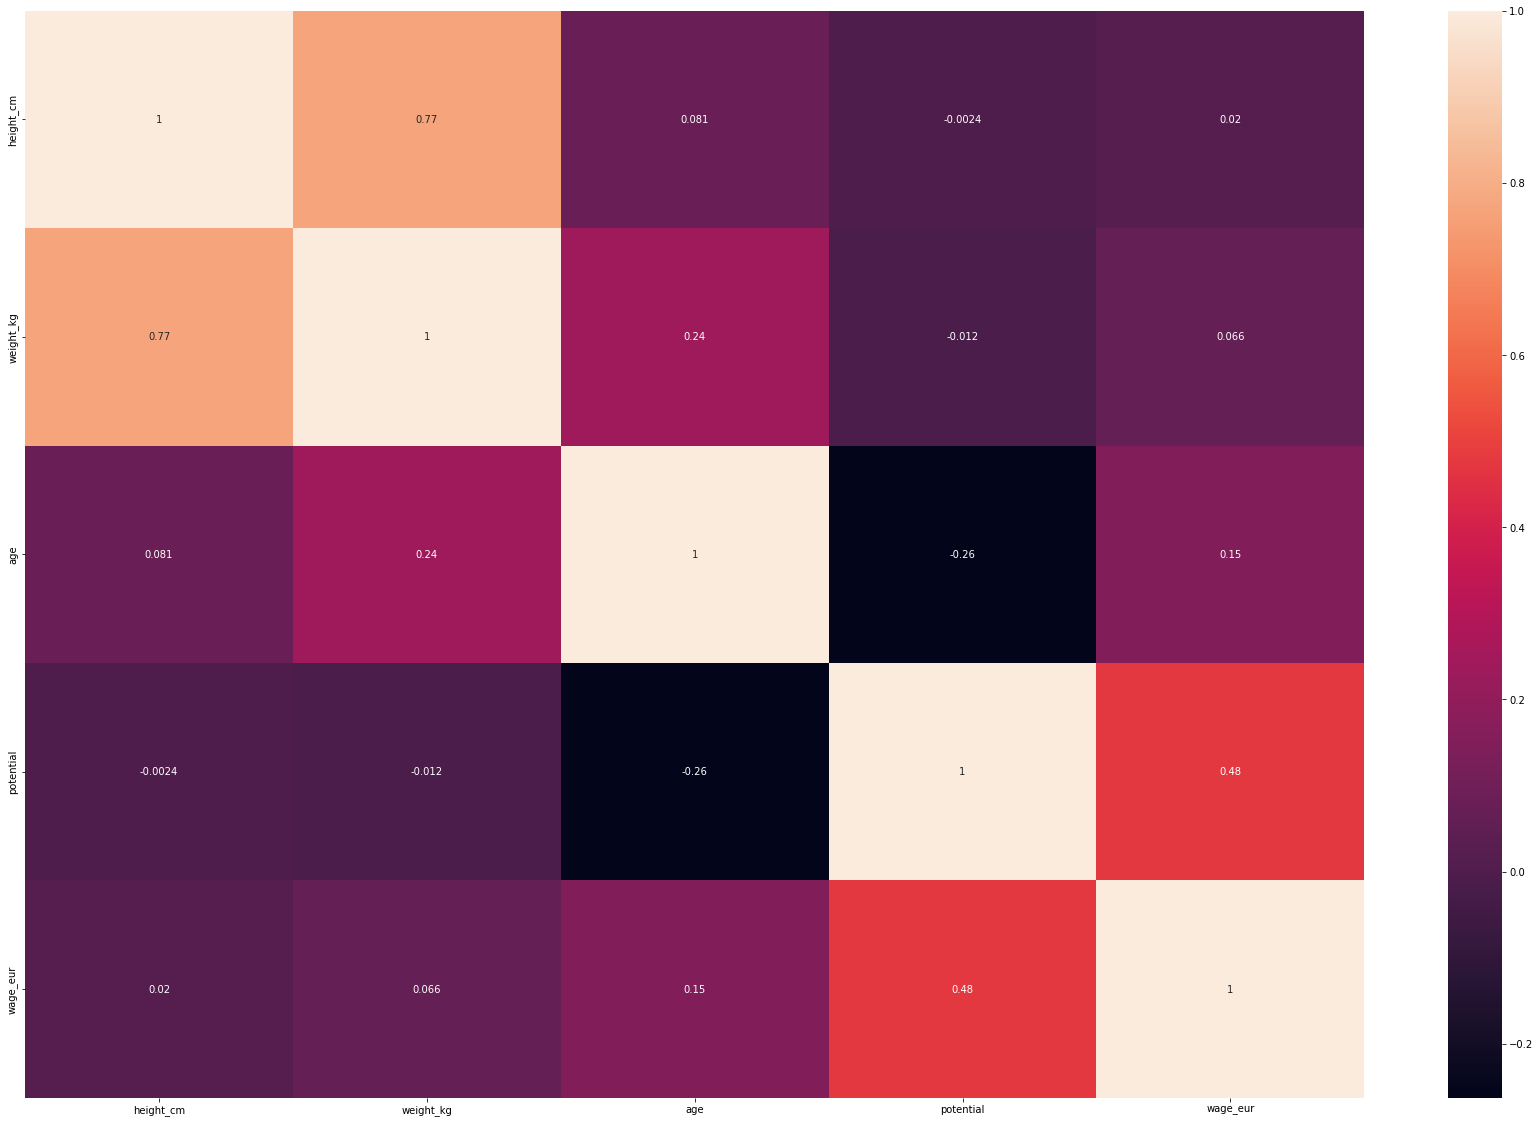

In [119]:
sns.heatmap(numerical_col.corr(),annot=True)
plt.show()

## Different nations participating in fifa 2020

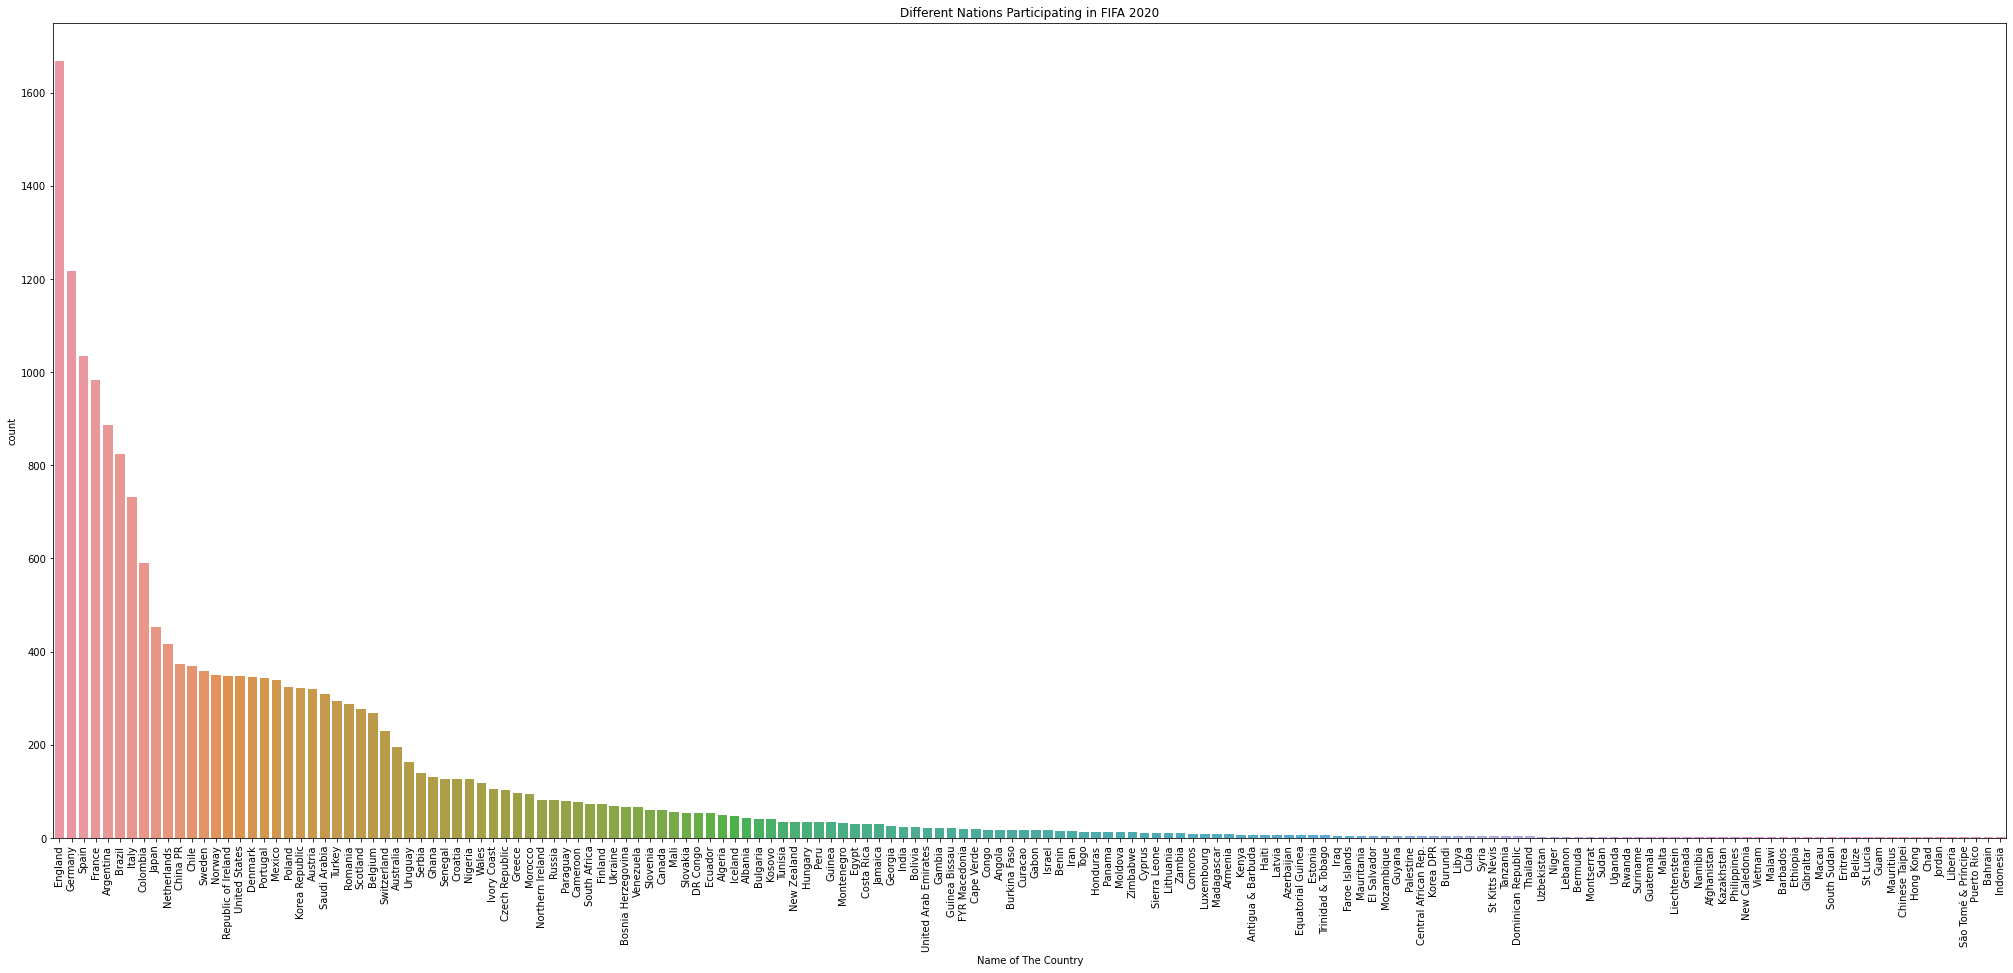

In [120]:
plt.figure(figsize=(35,15))
sns.barplot(x=df['nationality'].value_counts().keys(),y=df['nationality'].value_counts())
plt.title('Different Nations Participating in FIFA 2020')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

## Nationality of players

In [121]:
df['nationality'].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

Listing Top 5 countries with most players.

In [122]:
df['nationality'].value_counts()[0:5]

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64

In [123]:
df['nationality'].value_counts()[0:5].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object')

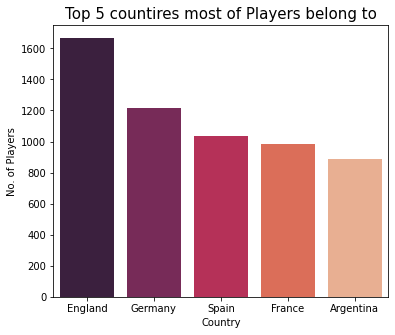

In [124]:
plt.figure(figsize=(6,5))
sns.barplot(x=df['nationality'].value_counts()[0:5].keys(),y=df['nationality'].value_counts()[0:5],data=df,palette="rocket")
plt.title('Top 5 countires most of Players belong to',fontsize=15)
plt.xlabel('Country')
plt.ylabel('No. of Players')
plt.show()

## Extracting salary and names of players

In [125]:
players_salary = df[['short_name','wage_eur']]

In [126]:
players_salary.head()

,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


Sorting data on basis of highest paid football player.

In [127]:
players_salary = players_salary.sort_values(by=['wage_eur'],ascending=False)

In [128]:
players_salary.head()

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


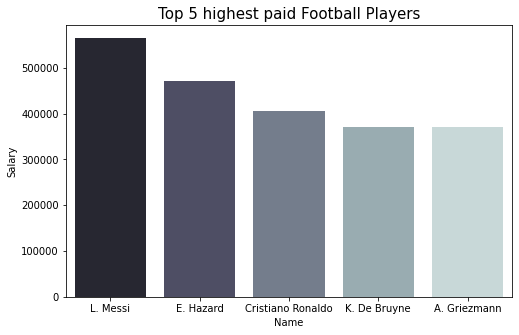

In [129]:
plt.figure(figsize=(8,5))
sns.barplot(x=players_salary['short_name'][0:5],y=players_salary['wage_eur'][0:5],palette='bone')
plt.title('Top 5 highest paid Football Players',fontsize=15)
plt.xlabel('Name')
plt.ylabel('Salary')
plt.show()

## Players from Germany :)

In [130]:
df['nationality']=='Germany'

0        False
1        False
2        False
3        False
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Name: nationality, Length: 18278, dtype: bool

In [131]:
Germany = df[df['nationality']=='Germany']
Germany.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,0,0,0,0,0,0,0,0,0,0
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,0,0,0,0,0,0,0,0,0,0
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
109,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


In [132]:
Germany.shape

(1216, 104)

Tallest German Players.

In [133]:
Germany.sort_values(by=['height_cm'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,0,0,0,0,0,0,0,0,0,0
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,0,0,0,0,0,0,0,0,0,0
11859,167437,https://sofifa.com/player/167437/dominik-stroh...,D. Stroh-Engel,Dominik Stroh-Engel,33,1985-11-27,197,94,Germany,SpVgg Unterhaching,...,39+2,45+2,45+2,45+2,39+2,39+2,47+2,47+2,47+2,39+2
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,0,0,0,0,0,0,0,0,0,0


Most weighted German Players.

In [134]:
Germany.sort_values(by=['weight_kg'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,0,0,0,0,0,0,0,0,0,0
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,0,0,0,0,0,0,0,0,0,0
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,0,0,0,0,0,0,0,0,0,0
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,0,0,0,0,0,0,0,0,0,0
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2


Highest paid German player.

In [135]:
Germany.sort_values(by=['wage_eur'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,0,0,0,0,0,0,0,0,0,0
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,...,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3


In [136]:
Germany[['short_name','wage_eur']].sort_values(by='wage_eur',ascending=False).head()

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


## Players bearing best Shooting skills

In [137]:
player_shooting = df[['short_name','shooting']]

In [138]:
player_shooting.sort_values(by=['shooting'],ascending=False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
19,L. Suárez,89.0


## Extracting name of players bearing best Defending skills

In [139]:
player_defend = df[['short_name','defending','nationality','club']]

In [140]:
player_defend.sort_values(by=['defending'],ascending=False).head()

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
35,D. Godín,89.0,Uruguay,Inter
11,K. Koulibaly,89.0,Senegal,Napoli
49,M. Hummels,89.0,Germany,Borussia Dortmund


## Real Madrid

In [141]:
real_madrid = df[df['club']=='Real Madrid']

In [142]:
real_madrid.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,...,0,0,0,0,0,0,0,0,0,0
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3


Highest paid players of Real Madrid club.

In [143]:
real_madrid.sort_values(by=['wage_eur'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3


Highest shooting skill players of Real Madrid club.

In [144]:
real_madrid.sort_values(by=['shooting'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
100,173731,https://sofifa.com/player/173731/gareth-bale/2...,G. Bale,Gareth Frank Bale,29,1989-07-16,185,82,Wales,Real Madrid,...,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
106,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,27,1991-07-12,180,75,Colombia,Real Madrid,...,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3
161,232432,https://sofifa.com/player/232432/luka-jovic/20...,L. Jović,Luka Jović,21,1997-12-23,182,85,Serbia,Real Madrid,...,55+2,53+2,53+2,53+2,55+2,51+2,47+2,47+2,47+2,51+2


## Best players based on there overall scores.

In [145]:
best_player_oa = df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['short_name','age','club','nationality','player_positions']]

In [149]:
#10 best players based on there overalls
best_player_oa.head(10)

,short_name,age,club,nationality,player_positions
121,N. Fekir,25,Real Betis,France,CAM
672,Borja Valero,34,Inter,Spain,"CAM, CDM"
7223,M. Bodmer,36,Amiens SC,France,"CAM, CDM, CB"
1849,S. Armstrong,27,Southampton,Scotland,"CAM, CDM, CM"
458,J. Quintero,26,River Plate,Colombia,"CAM, CF"
3499,P. Gerkens,24,RSC Anderlecht,Belgium,"CAM, CF, CM"
6556,H. Yamada,30,Júbilo Iwata,Japan,"CAM, CF, LM"
5812,G. Kharaishvili,22,IFK Göteborg,Georgia,"CAM, CF, LW"
5629,K. Shibasaki,34,Sanfrecce Hiroshima,Japan,"CAM, CF, RM"
2599,S. Vilakazi,29,South Africa,South Africa,"CAM, CF, RW"


## Best player based on there potential.

In [147]:
best_player_poten = df.iloc[df.groupby(df['player_positions'])['potential'].idxmax()][['short_name','age','club','nationality','player_positions']]

In [148]:
best_player_poten.head(10)

,short_name,age,club,nationality,player_positions
121,N. Fekir,25,Real Betis,France,CAM
2717,B. Mensah,24,Kayserispor,Ghana,"CAM, CDM"
7223,M. Bodmer,36,Amiens SC,France,"CAM, CDM, CB"
2207,A. Browne,24,Preston North End,Republic of Ireland,"CAM, CDM, CM"
458,J. Quintero,26,River Plate,Colombia,"CAM, CF"
3499,P. Gerkens,24,RSC Anderlecht,Belgium,"CAM, CF, CM"
15994,O. Deman,19,KSV Cercle Brugge,Belgium,"CAM, CF, LM"
5812,G. Kharaishvili,22,IFK Göteborg,Georgia,"CAM, CF, LW"
5629,K. Shibasaki,34,Sanfrecce Hiroshima,Japan,"CAM, CF, RM"
2599,S. Vilakazi,29,South Africa,South Africa,"CAM, CF, RW"
